In [1]:

!pip install kaggle

In [9]:
from google.colab import files
files.upload()  

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahsanchaudhary","key":"031dccb852ef574d1c381398b4a71ab9"}'}

In [10]:


!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/

# allow all permissions
!chmod 600 ~/.kaggle/kaggle.json


In [11]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:29<00:00, 61.7MB/s]
100% 2.29G/2.29G [00:30<00:00, 81.8MB/s]


In [39]:
from zipfile import ZipFile
file_name = 'chest-xray-pneumonia.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
 

In [13]:
!pip install -q keras

In [14]:
import keras

In [15]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD 

In [18]:
# CNN Model
classifier = Sequential()


# Convolution
classifier.add(Conv2D(64,(3,3), input_shape=(64,64,3), activation='relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution
classifier.add(Conv2D(32,(3,3), activation='relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Conv2D(32,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))


# Flattening
classifier.add(Flatten())


classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))


# Compilation 

classifier.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [19]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

In [20]:

from keras.preprocessing.image import ImageDataGenerator

train = ImageDataGenerator(rescale=1./255,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True)


test = ImageDataGenerator(rescale=1./255)



In [21]:
train_set = train.flow_from_directory('chest_xray/train',
                                      target_size  = (64, 64),
                                      batch_size = 32,
                                      class_mode ='binary')



Found 5216 images belonging to 2 classes.


In [22]:
test_set = test.flow_from_directory('chest_xray/test',
                                      target_size  = (64, 64),
                                      batch_size = 32,
                                      class_mode='binary')



Found 624 images belonging to 2 classes.


In [23]:
train_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [24]:
test_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [29]:
ahsanres = classifier.fit_generator(train_set,
                                   steps_per_epoch=50,
                                   epochs=10, 
                                   validation_data=test_set,
                                   validation_steps=10)

Epoch 1/10
50/50 [==============================] - 31s 625ms/step - loss: 0.1494 - accuracy: 0.9425 - val_loss: 0.5036 - val_accuracy: 0.8411
Epoch 2/10
50/50 [==============================] - 31s 626ms/step - loss: 0.1437 - accuracy: 0.9425 - val_loss: 0.3090 - val_accuracy: 0.8958
Epoch 3/10
50/50 [==============================] - 31s 624ms/step - loss: 0.1744 - accuracy: 0.9375 - val_loss: 0.4374 - val_accuracy: 0.8281
Epoch 4/10
50/50 [==============================] - 31s 617ms/step - loss: 0.1567 - accuracy: 0.9375 - val_loss: 0.2796 - val_accuracy: 0.8958
Epoch 5/10
50/50 [==============================] - 31s 619ms/step - loss: 0.1423 - accuracy: 0.9475 - val_loss: 0.4609 - val_accuracy: 0.8516
Epoch 6/10
50/50 [==============================] - 30s 606ms/step - loss: 0.1540 - accuracy: 0.9413 - val_loss: 0.3941 - val_accuracy: 0.8411
Epoch 7/10
50/50 [==============================] - 31s 621ms/step - loss: 0.1559 - accuracy: 0.9456 - val_loss: 0.4533 - val_accuracy: 0.8333

tensorflow.python.keras.callbacks.History

[0.9431250095367432, 0.9375, 0.9446874856948853, 0.9424999952316284, 0.9396874904632568, 0.9434375166893005, 0.9474999904632568, 0.9456250071525574, 0.9456250071525574, 0.953125, 0.9459375143051147, 0.9468749761581421, 0.9534375071525574, 0.9540625214576721, 0.9534375071525574, 0.9490625262260437, 0.9553124904632568, 0.9534375071525574, 0.9565625190734863, 0.9528124928474426, 0.9574999809265137, 0.9593750238418579, 0.9553124904632568, 0.9571874737739563, 0.9596874713897705, 0.9606249928474426, 0.9581249952316284, 0.9537500143051147, 0.9609375, 0.9606249928474426]


In [32]:
print(ahsanres.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


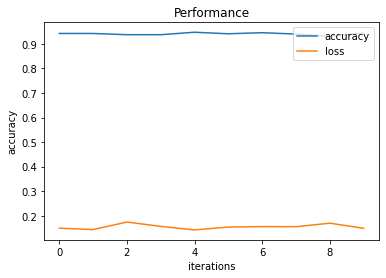

In [33]:
plt.plot(ahsanres.history['accuracy'])
plt.plot(ahsanres.history['loss'])
plt.title('Performance')
plt.ylabel('accuracy')
plt.xlabel('iterations')
plt.legend(['accuracy','loss'], loc= 'upper right')
plt.show()

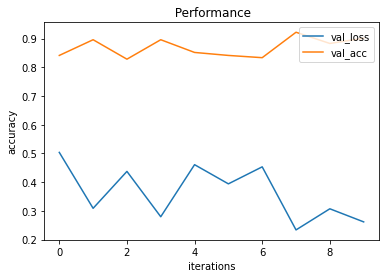

In [37]:
plt.plot(ahsanres.history['val_loss'])
plt.plot(ahsanres.history['val_accuracy'])
plt.title(' Performance')
plt.ylabel('accuracy')
plt.xlabel('iterations')
plt.legend(['val_loss','val_acc'], loc= 'upper right')
plt.show()